<a href="https://colab.research.google.com/github/Kim-Ken/my_implement_algo/blob/master/gradiend_descent_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [0]:
x1 = torch.tensor(1.0,requires_grad=True)
x2 = torch.tensor(1.0,requires_grad=True)
a = torch.tensor(2.0,requires_grad=False)
b = torch.tensor(1.0,requires_grad=False)
y = a*x1 + b*x2**2

In [0]:
print(y)
y.backward()

tensor(3., grad_fn=<AddBackward0>)


In [0]:
x1-y

tensor(-2., grad_fn=<SubBackward0>)

再急降下法

In [0]:
theta = 0.1
k=0
alpha=0.1
a=10
b=-15
x=torch.tensor(20.0,requires_grad=True)
y=torch.tensor(20.0,requires_grad=True)


In [0]:
y_list=[]
x_list=[]

In [0]:
while True:
  z= 4*x**2 + 3*y**2  -  16*x - 9*y 
  z.backward()
  dz = -torch.tensor([x.grad,y.grad])
  if dz.data.norm()<theta or k==100:
    break
  if k%10==9:
    alpha*=0.99
  t=torch.tensor([x,y]).clone().detach()+alpha*dz
  k+=1
  x_list.append(t.numpy())
  x,y= t[0].clone().detach(),t[1].clone().detach()
  x.requires_grad = True
  y.requires_grad = True

In [0]:
print(x_list)
print(y_list)

[array([5.5999994, 8.9      ], dtype=float32), array([2.7199998, 4.4599996], dtype=float32), array([2.144    , 2.6839995], dtype=float32), array([2.0288   , 1.9735999], dtype=float32), array([2.00576, 1.68944], dtype=float32), array([2.001152, 1.575776], dtype=float32), array([2.0002303, 1.5303104], dtype=float32), array([2.000046 , 1.5121242], dtype=float32)]
[]


In [0]:
z= x**2 + 3*y**2 + 3*y

In [0]:


def f(x, y):
    return 4*x**2 + 3*y**2 +  16*x - 9*y 


X, Y = np.mgrid[-30:30:0.1, -30:30:0.1]
#("X:\n", X)
#print("Y:\n", Y)
Z = f(X, Y)

<class 'matplotlib.contour.QuadContourSet'>


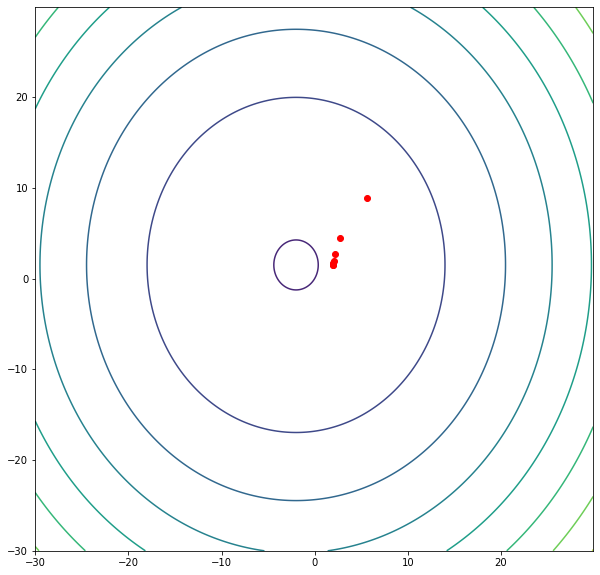

In [0]:
fig = plt.figure(figsize=(10, 10), facecolor="w")
ax = fig.add_subplot(111)
surf = ax.contour(X, Y, Z)
print(type(surf))  # <class 'mpl_toolkits.mplot3d.art3d.Poly3DCollection'>
for ss in x_list:
  plt.plot(ss[0],ss[1])
  plt.scatter(ss[0],ss[1],c='r')
plt.show()